In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Euro_2012_stats_TEAM.csv")
data

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


ТОП-5 країн за попадання по цілях:

In [3]:
data = data.sort_values("Shots on target", ascending=False)
top_5 = data.head(5)

top_5[["Team", "Shots on target"]]

,Team,Shots on target
13,Spain,42
7,Italy,34
5,Germany,32
4,France,22
10,Portugal,22


Які країни забили найбільше голів у пенальті?

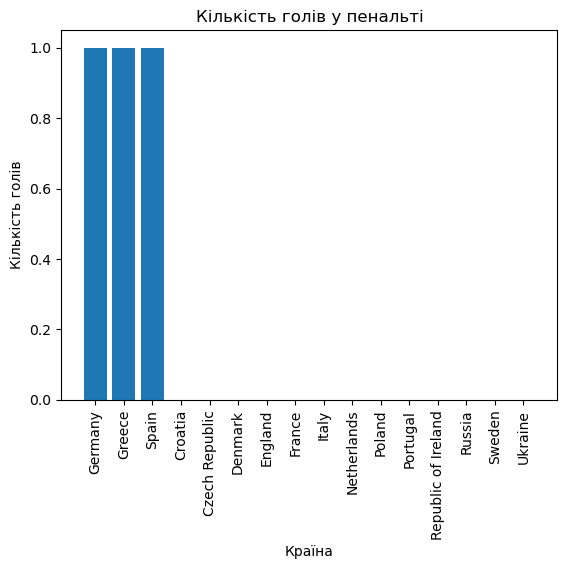

In [4]:
penalty_data = data[['Team', 'Penalty goals', 'Penalties not scored']]

# Групірування за країнами
penalty_data = penalty_data.groupby('Team').sum()

# Сортування за кількістю голів у пенальті
penalty_data = penalty_data.sort_values('Penalty goals', ascending=False)

# Побудова стовпчикової діаграми
plt.bar(penalty_data.index, penalty_data['Penalty goals'])
plt.title('Кількість голів у пенальті')
plt.xlabel('Країна')
plt.ylabel('Кількість голів')
plt.xticks(rotation=90)
plt.show()

Який відсоток ударів по воротах був відбитий воротарем?

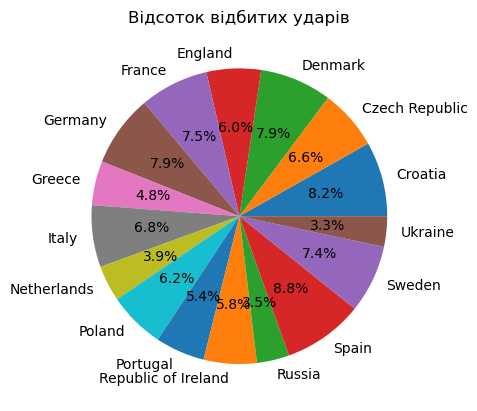

In [5]:
data['Saves-to-shots ratio'] = data['Shots on target'] / (data['Shots on target'] + data['Shots off target'])
shots_data = data.groupby('Team')['Saves-to-shots ratio'].mean()

plt.pie(shots_data, labels=shots_data.index, autopct='%1.1f%%')
plt.title('Відсоток відбитих ударів')
plt.show()